In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 5

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
Total params: 1,125
Trainable params: 1,125
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
29/30 [============================>.] - ETA: 0s - loss: 1.6312 - accuracy: 0.2438
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 2s 18ms/step - loss: 1.6282 - accuracy: 0.2459 - val_loss: 1.4727 - val_accuracy: 0.3575
Epoch 2/1000
25/30 [========================>.....] - ETA: 0s - loss: 1.4648 - accuracy: 0.3244
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 9ms/step - loss: 1.4589 - accuracy: 0.3251 - val_loss: 1.3789 - val_accuracy: 0.4128
Epoch 3/1000
30/30 [==============================] - ETA: 0s - loss: 1.3691 - accuracy: 0.3735
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 12ms/step - loss: 1.3691 - accuracy: 0.3735 - val_loss: 1.2993 - val_accuracy: 0.4728
Epoch 4/1000
28/30 [===========================>..] - ETA: 0s - loss: 1.3222 - accuracy: 0.3876

21/30 [====================>.........] - ETA: 0s - loss: 0.7549 - accuracy: 0.6983
Epoch 28: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 10ms/step - loss: 0.7633 - accuracy: 0.6960 - val_loss: 0.4255 - val_accuracy: 0.9392
Epoch 29/1000
21/30 [====================>.........] - ETA: 0s - loss: 0.7232 - accuracy: 0.7269
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 12ms/step - loss: 0.7283 - accuracy: 0.7231 - val_loss: 0.4143 - val_accuracy: 0.9448
Epoch 30/1000
26/30 [=========================>....] - ETA: 0s - loss: 0.7487 - accuracy: 0.7094
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 11ms/step - loss: 0.7390 - accuracy: 0.7123 - val_loss: 0.4129 - val_accuracy: 0.9416
Epoch 31/1000
27/30 [==========================>...] - ETA: 0s - loss: 0.7350 - accuracy: 0.7156
Epoch

22/30 [=====================>........] - ETA: 0s - loss: 0.6207 - accuracy: 0.7642
Epoch 55: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 10ms/step - loss: 0.6187 - accuracy: 0.7649 - val_loss: 0.2811 - val_accuracy: 0.9597
Epoch 56/1000
23/30 [======================>.......] - ETA: 0s - loss: 0.6290 - accuracy: 0.7643
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 10ms/step - loss: 0.6291 - accuracy: 0.7652 - val_loss: 0.2856 - val_accuracy: 0.9597
Epoch 57/1000
30/30 [==============================] - ETA: 0s - loss: 0.6104 - accuracy: 0.7710
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 7ms/step - loss: 0.6104 - accuracy: 0.7710 - val_loss: 0.2794 - val_accuracy: 0.9590
Epoch 58/1000
22/30 [=====================>........] - ETA: 0s - loss: 0.6090 - accuracy: 0.7649
Epoch 

21/30 [====================>.........] - ETA: 0s - loss: 0.5159 - accuracy: 0.8114
Epoch 82: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 11ms/step - loss: 0.5307 - accuracy: 0.8068 - val_loss: 0.2315 - val_accuracy: 0.9669
Epoch 83/1000
28/30 [===========================>..] - ETA: 0s - loss: 0.5421 - accuracy: 0.8022
Epoch 83: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 14ms/step - loss: 0.5470 - accuracy: 0.8005 - val_loss: 0.2379 - val_accuracy: 0.9597
Epoch 84/1000
26/30 [=========================>....] - ETA: 0s - loss: 0.5625 - accuracy: 0.7915
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 9ms/step - loss: 0.5623 - accuracy: 0.7902 - val_loss: 0.2353 - val_accuracy: 0.9645
Epoch 85/1000
22/30 [=====================>........] - ETA: 0s - loss: 0.5487 - accuracy: 0.7983
Epoch 

Epoch 109/1000
22/30 [=====================>........] - ETA: 0s - loss: 0.5326 - accuracy: 0.7990
Epoch 109: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 11ms/step - loss: 0.5267 - accuracy: 0.8028 - val_loss: 0.2232 - val_accuracy: 0.9676
Epoch 110/1000
25/30 [========================>.....] - ETA: 0s - loss: 0.5269 - accuracy: 0.8056
Epoch 110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 9ms/step - loss: 0.5235 - accuracy: 0.8047 - val_loss: 0.2305 - val_accuracy: 0.9613
Epoch 111/1000
28/30 [===========================>..] - ETA: 0s - loss: 0.5153 - accuracy: 0.8080
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 8ms/step - loss: 0.5158 - accuracy: 0.8073 - val_loss: 0.2212 - val_accuracy: 0.9645
Epoch 112/1000
21/30 [====================>.........] - ETA: 0s - loss: 0.5351 - acc

Epoch 136/1000
26/30 [=========================>....] - ETA: 0s - loss: 0.4987 - accuracy: 0.8188
Epoch 136: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 9ms/step - loss: 0.4969 - accuracy: 0.8173 - val_loss: 0.2182 - val_accuracy: 0.9582
Epoch 137/1000
28/30 [===========================>..] - ETA: 0s - loss: 0.5090 - accuracy: 0.8069
Epoch 137: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 13ms/step - loss: 0.5110 - accuracy: 0.8063 - val_loss: 0.2250 - val_accuracy: 0.9574
Epoch 138/1000
26/30 [=========================>....] - ETA: 0s - loss: 0.5090 - accuracy: 0.8089
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 10ms/step - loss: 0.5135 - accuracy: 0.8068 - val_loss: 0.2160 - val_accuracy: 0.9637
Epoch 139/1000
30/30 [==============================] - ETA: 0s - loss: 0.5028 - ac

Epoch 163/1000
24/30 [=======================>......] - ETA: 0s - loss: 0.4626 - accuracy: 0.8285
Epoch 163: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 10ms/step - loss: 0.4712 - accuracy: 0.8236 - val_loss: 0.2209 - val_accuracy: 0.9590
Epoch 164/1000
27/30 [==========================>...] - ETA: 0s - loss: 0.5025 - accuracy: 0.8105
Epoch 164: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 16ms/step - loss: 0.5002 - accuracy: 0.8121 - val_loss: 0.2141 - val_accuracy: 0.9613
Epoch 165/1000
28/30 [===========================>..] - ETA: 0s - loss: 0.4767 - accuracy: 0.8245
Epoch 165: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 11ms/step - loss: 0.4752 - accuracy: 0.8250 - val_loss: 0.2045 - val_accuracy: 0.9629
Epoch 166/1000
25/30 [========================>.....] - ETA: 0s - loss: 0.4848 - a

In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

10/10 [==============================] - 0s 4ms/step - loss: 0.2086 - accuracy: 0.9605


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 251ms/step
[9.0974623e-01 8.6439520e-02 3.7773561e-03 3.5826510e-05 1.1250589e-06]
0


# Confusion matrix

40/40 [==============================] - 0s 3ms/step


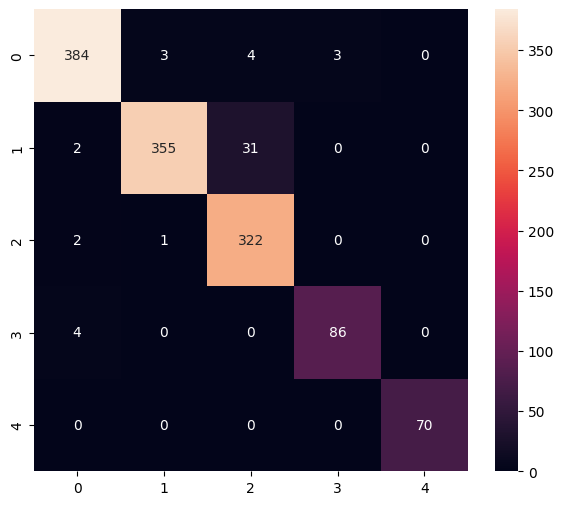

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       394
           1       0.99      0.91      0.95       388
           2       0.90      0.99      0.94       325
           3       0.97      0.96      0.96        90
           4       1.00      1.00      1.00        70

    accuracy                           0.96      1267
   macro avg       0.97      0.97      0.97      1267
weighted avg       0.96      0.96      0.96      1267



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\CRAZYN~1\AppData\Local\Temp\tmpsuyv9b_r\assets


INFO:tensorflow:Assets written to: C:\Users\CRAZYN~1\AppData\Local\Temp\tmpsuyv9b_r\assets


6588

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

Wall time: 0 ns


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[9.0974623e-01 8.6439572e-02 3.7773577e-03 3.5826441e-05 1.1250579e-06]
0
